# LIYS2

In [1]:
from mp_api.client import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mp_key = "PgRtTbiMJ5N3guKB8xgaTcXoz0bUQyKD"
mp_id = "mp-15788"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_phonon_bandstructure_by_material_id(mp_id)

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 1) Structure de bandes de phonons

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

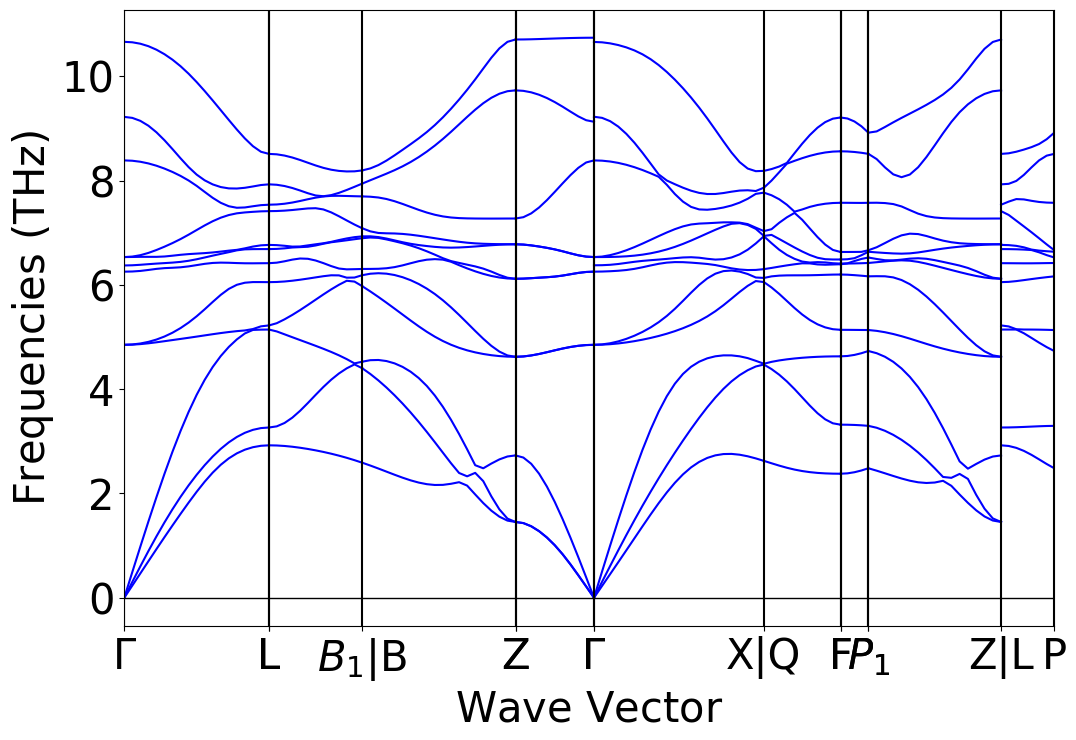

In [4]:
ph_band = m.get_phonon_bandstructure_by_material_id(mp_id)
bsplotter = PhononBSPlotter(ph_band)
bsplotter.show()

# 2) Zones de Brillouin

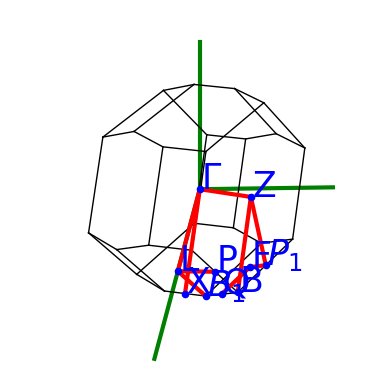

In [5]:
PhononBSPlotter(prim_struc).plot_brillouin()

# 3) Vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin

In [6]:
print("Il nous faut tout d'abord déterminer quelles sont les bandes acoustiques. Celles-ci correspondent aux bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Pour repérer 3 branches acoustiques, il faut observer les branches où les bandes de fréquence commencent à zéro au point gamma (gamma est le centre de la zone de Brillouin). En observant la structure de bandes de phonons, on remarque que les 3 directions pertinentes sont Γ - L, Z - Γ et Γ - X|Q.")

Il nous faut tout d'abord déterminer quelles sont les bandes acoustiques. Celles-ci correspondent aux bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Pour repérer 3 branches acoustiques, il faut observer les branches où les bandes de fréquence commencent à zéro au point gamma (gamma est le centre de la zone de Brillouin). En observant la structure de bandes de phonons, on remarque que les 3 directions pertinentes sont Γ - L, Z - Γ et Γ - X|Q.


In [7]:
print("Pour calculer la vitesse du son pour les différentes branches acoustiques, la méthode utilisée se base sur le calcul de la pente des branches acoustiques à fréquence nulle en extrapolant la tangente de ces branches dans les directions Γ - L, Z - Γ et Γ - X|Q. Après avoir calculé leur pente, multiplions ce résultat par 2π pour obtenir la vitesse du son en fonction de la fréquence angulaire ω et du vecteur d'onde k.")

Pour calculer la vitesse du son pour les différentes branches acoustiques, la méthode utilisée se base sur le calcul de la pente des branches acoustiques à fréquence nulle en extrapolant la tangente de ces branches dans les directions Γ - L, Z - Γ et Γ - X|Q. Après avoir calculé leur pente, multiplions ce résultat par 2π pour obtenir la vitesse du son en fonction de la fréquence angulaire ω et du vecteur d'onde k.


In [8]:
ph_bandstruc = PhononBSPlotter(prim_struc)
data_ph = ph_bandstruc.bs_plot_data()
distances = data_ph['distances']
frequency = data_ph['frequency']

A = 1e-10  # 1 Å en m
toHz = 1e12 # 1 THz à Hz

In [9]:
f_verte = frequency[0][0]
df = (f_verte[1]-f_verte[0])*toHz
dq = (distances[0][1]-distances[0][0])/A
pente_verte = df/dq

v_verte = 2*np.pi*np.abs(pente_verte)  
print("La vitesse du son pour la première bande acoustique dans la direction Γ - L vaut", v_verte, "m/s.")

La vitesse du son pour la première bande acoustique dans la direction Γ - L vaut 2760.9009513811457 m/s.


In [10]:
f_jaune = frequency[3][1]
df = (f_jaune[-1]-f_jaune[-2])*toHz
dq = (distances[3][-1]-distances[3][-2])/A
pente_jaune = df/dq

v_jaune = 2*np.pi*np.abs(pente_jaune)
print("La vitesse du son pour la deuxième bande acoustique dans la direction Z - Γ vaut",v_jaune,"m/s.")

La vitesse du son pour la deuxième bande acoustique dans la direction Z - Γ vaut 2627.891386597078 m/s.


In [11]:
f_rouge = frequency[4][2]
df = (f_rouge[1]-f_rouge[0])*toHz
dq = (distances[4][1]-distances[4][0])/A
pente_rouge = df/dq

v_rouge = 2*np.pi*np.abs(pente_rouge)
print("La vitesse du son pour la troisième bande acoustique dans la direction Γ - X|Q vaut",v_rouge,"m/s.")

La vitesse du son pour la troisième bande acoustique dans la direction Γ - X|Q vaut 5921.067289068179 m/s.


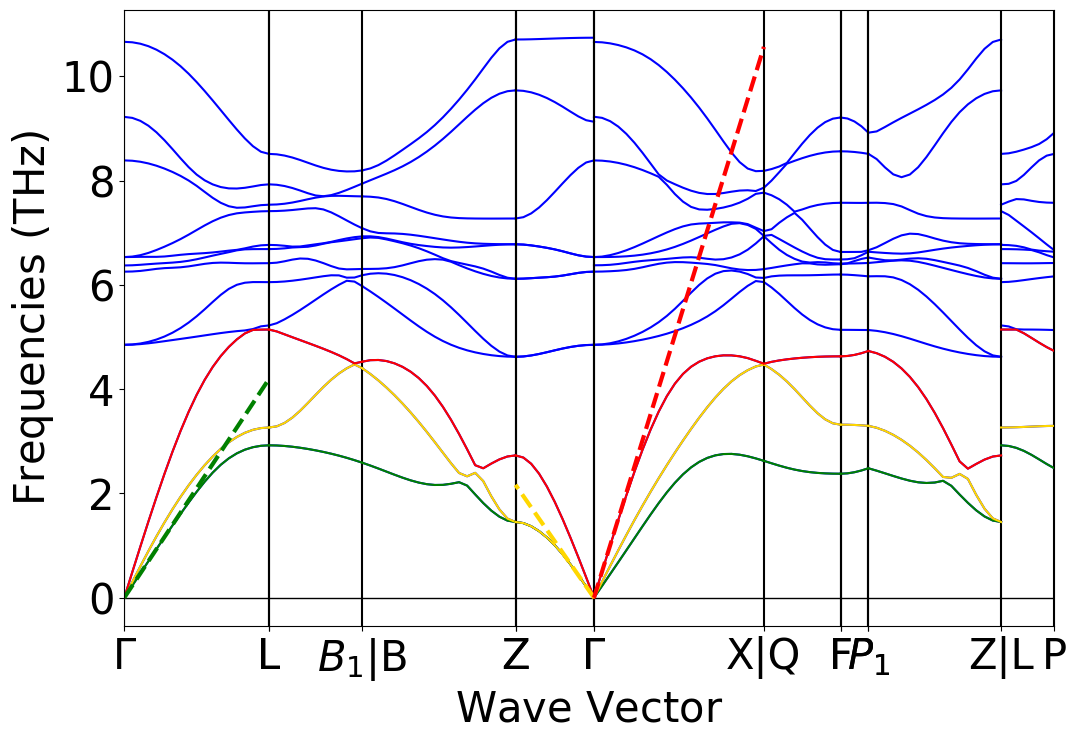

In [12]:
ph_bandstruc.get_plot()
for i in range(len(distances)):
    plt.plot(distances[i], frequency[i][0], color = 'green')
    plt.plot(distances[i], frequency[i][1], color = 'gold')
    plt.plot(distances[i], frequency[i][2], color = 'red')

plt.plot([distances[0][0], distances[0][-1]], 
         [0,v_verte/(2*np.pi*toHz*A)*(distances[0][-1]-distances[0][0])], 
         '--', color="green",lw=3)

plt.plot([distances[3][-1], distances[3][0]], 
         [0,v_jaune/(2*np.pi*toHz*A)*(distances[3][-1]-distances[3][0])], 
         '--', color="gold",lw=3)

plt.plot([distances[4][0], distances[4][-1]], 
         [0,v_rouge/(2*np.pi*toHz*A)*(distances[4][-1]-distances[4][0])], 
         '--', color="red",lw=3)

plt.show()